## Deep Neural Network for Cancer Classification

In [202]:
# !pip install pandas==2.2.2
# !pip install numpy==1.26.4
# !pip install matplotlib==3.8.0
# !pip install scikit-learn==1.5.0
# !pip install torch==2.3.1
!pip install ucimlrepo==0.0.7

### Load the Data
#### Breast Cancer Wisconsin (Diagnostic)
The Breast Cancer Wisconsin (Diagnostic) dataset is a classic dataset used for classification tasks. It contains 569 samples of breast cancer cells, each with 30 features. The dataset is divided into two classes: benign and malignant. The goal is to classify the breast cancer cells into one of the two classes.

This dataset is free to use and is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

First, we need to load our dataset and take a look at its structure.

In [203]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breat_cancer_wisconsin_iagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breat_cancer_wisconsin_iagnostic.data.features
y = breat_cancer_wisconsin_iagnostic.data.targets

# print first few rows of feature
print(X.head())

# print first few rows of target
print(y.head())

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60 

In [204]:
display(f"X shape: {X.shape}")
display(f"y shape: {y.shape}")

'X shape: (569, 30)'

'y shape: (569, 1)'

In [205]:
display(y['Diagnosis'].value_counts())

,count
Diagnosis,
B,357
M,212


In [206]:
import pandas as pd

# Combine features and target into a single DataFrame for easier manipulation
data = pd.concat([X, y], axis=1)

# Separate two classes
data_B = data[data['Diagnosis'] == 'B']
data_M = data[data['Diagnosis'] == 'M']

# Select 200 samples from each class
data_B = data_B.sample(n=200, random_state=42)
data_M = data_M.sample(n=200, random_state=42)

# Combine the two classes
balanced_data = pd.concat([data_B, data_M])

display(balanced_data['Diagnosis'].value_counts())

,count
Diagnosis,
B,200
M,200


### Data Preprocessing

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Separate features and targets
X = balanced_data.drop('Diagnosis', axis=1)
y = balanced_data['Diagnosis']

# Convert the targets to binary labels
y = y.map({'B': 0, 'M': 1})
display(X)
display(y)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,15.320,17.27,103.20,713.3,0.13350,0.22840,0.244800,0.12420,0.2398,0.07596,...,17.73,22.66,119.80,928.8,0.17650,0.45030,0.44290,0.22290,0.3258,0.11910
328,16.270,20.71,106.90,813.7,0.11690,0.13190,0.147800,0.08488,0.1948,0.06277,...,19.28,30.38,129.80,1121.0,0.15900,0.29470,0.35970,0.15830,0.3103,0.08200
199,14.450,20.22,94.49,642.7,0.09872,0.12060,0.118000,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.15520,0.40560,0.49670,0.18380,0.4753,0.10130
194,14.860,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.08878,0.1737,0.06672,...,16.08,27.78,118.60,784.7,0.13160,0.46480,0.45890,0.17270,0.3000,0.08701


,Diagnosis
395,0
110,0
481,0
493,0
136,0
...,...
257,1
328,1
199,1
194,1


In [208]:
# Split the data into training and test sets
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
display(f"X_train shape: ", X_train.shape)
display(f"X_test shape: ", X_test.shape)
display(f"y_train shape: ", y_train.shape)
display(f"y_test shape: ", y_test.shape)

'X_train shape: '

(320, 30)

'X_test shape: '

(80, 30)

'y_train shape: '

(320,)

'y_test shape: '

(80,)

Then we standardize the feature values using the StandardScaler from scikit-learn.

Standardizing the data involves transforming the features so that they have a mean of 0 and a standard deviation of 1. This helps in ensuring that all features contribute equally to the result and helps the model converge faster during training.

Fitting the Scaler: We calculate the mean and standard deviation for each feature in the training set using the fit method of the StandardScaler.
Transforming the Training Data: We apply the standardization to the training data using the transform method, which scales the features accordingly.
Transforming the Test Data: We apply the same transformation to the test data using the same scaler. This ensures that both training and test sets are standardized in the same way.
By standardizing the data, we make sure that each feature contributes equally to the training process, which helps in achieving better performance and faster convergence of the neural network model.

Finally, we convert the NumPy arrays to PyTorch tensors.

In [209]:
from torch.utils.data import DataLoader, TensorDataset

# Standardized the data
# Initialize the StandardScaler

scaler = StandardScaler()
# Fit the scalar on training data and transform it
X_train = scaler.fit_transform(X_train)
# Fit the scalar on testing data and transform it
X_test = scaler.fit_transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

### Build and Train the Neural Network Model

We will define our neural network architecture, specify the loss function and optimizer, and then train the model.

First, we define the neural network architecture using the `nn.Module` class in PyTorch. Our model consists of an input layer, one hidden layer, and an output layer with 2 neurons corresponding to the 2 classes.

Below is an example of the neural network model, it has 8 neurons in the input layer, 8 neurons in the hidden layer, and 2 neurons in the output layer.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/j-MFHvfzhrY04qVMsClOGA/8-8-2.jpg" alt="image" width="50%">

In [210]:
import torch.nn as nn

class ClassificationNet(nn.Module):

  def __init__(self, input_units=30, hidden_units=64, output_units=2):
    super(ClassificationNet, self).__init__()
    self.inputlayer = nn.Linear(input_units, hidden_units)
    self.hiddenlayer = nn.Linear(hidden_units, output_units)

  def forward(self, x):
    x = torch.relu(self.inputlayer(x))
    x = self.hiddenlayer(x)
    return x

# instantiate the mode
model = ClassificationNet(input_units=30, hidden_units=64, output_units=2)

In [211]:
print(model)

ClassificationNet(
  (inputlayer): Linear(in_features=30, out_features=64, bias=True)
  (hiddenlayer): Linear(in_features=64, out_features=2, bias=True)
)


In [212]:
import torch.optim as optim

# Define the loss function and optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [213]:
epochs = 10
train_losses = []
test_losses = []

def train_model(epochs):
  for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for x, y in train_loader:
      yhat = model(x)
      loss = criterion(yhat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
      for x, y in test_loader:
        yhat = model(x)
        loss = criterion(yhat, y)
        test_loss += loss.item()
    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f"Epoch: [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

train_model(10)

Epoch: [1/10], Train Loss: 0.8063, Test Loss: 0.6818
Epoch: [2/10], Train Loss: 0.5819, Test Loss: 0.5300
Epoch: [3/10], Train Loss: 0.4379, Test Loss: 0.4123
Epoch: [4/10], Train Loss: 0.3350, Test Loss: 0.3557
Epoch: [5/10], Train Loss: 0.2696, Test Loss: 0.3051
Epoch: [6/10], Train Loss: 0.2229, Test Loss: 0.2574
Epoch: [7/10], Train Loss: 0.1908, Test Loss: 0.2229
Epoch: [8/10], Train Loss: 0.1672, Test Loss: 0.2148
Epoch: [9/10], Train Loss: 0.1498, Test Loss: 0.1855
Epoch: [10/10], Train Loss: 0.1358, Test Loss: 0.1803


### Visualize the Training and Test Loss

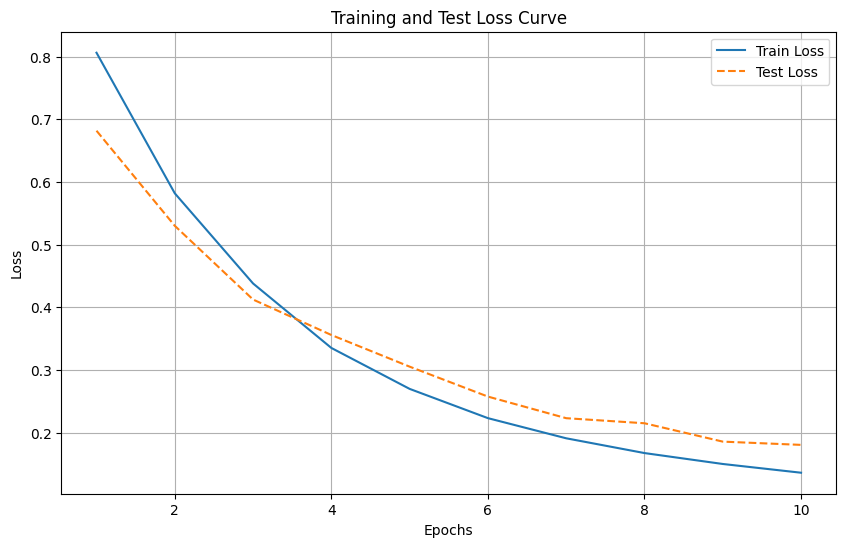

In [214]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [215]:
new_model = ClassificationNet(input_units=30, hidden_units=64, output_units=2)
optimizer = optim.Adam(new_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
  new_model.train()
  running_loss = 0.0
  for x, y in train_loader:
    optimizer.zero_grad()
    yaht = new_model(x)
    loss = criterion(yaht, y)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(train_loader)
  train_losses.append(train_loss)

  new_model.eval()
  test_loss = 0.0
  with torch.no_grad():
    for x, y in test_loader:
      yhat = new_model(x)
      loss = criterion(yhat, y)
      test_loss += loss.item()
  test_loss /= len(test_loader)
  test_losses.append(test_loss)

  print(f"Epoch: [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

Epoch: [1/10], Train Loss: 0.6257, Test Loss: 0.5467
Epoch: [2/10], Train Loss: 0.4629, Test Loss: 0.4299
Epoch: [3/10], Train Loss: 0.3534, Test Loss: 0.3646
Epoch: [4/10], Train Loss: 0.2735, Test Loss: 0.3223
Epoch: [5/10], Train Loss: 0.2209, Test Loss: 0.2540
Epoch: [6/10], Train Loss: 0.1877, Test Loss: 0.2517
Epoch: [7/10], Train Loss: 0.1618, Test Loss: 0.2300
Epoch: [8/10], Train Loss: 0.1436, Test Loss: 0.2256
Epoch: [9/10], Train Loss: 0.1306, Test Loss: 0.2047
Epoch: [10/10], Train Loss: 0.1193, Test Loss: 0.1599


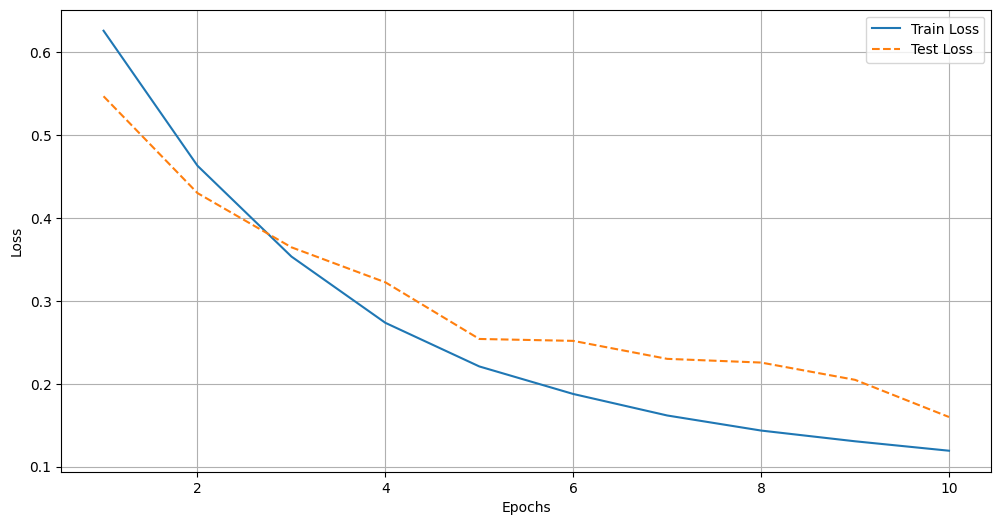

In [216]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs+1), train_losses, label = 'Train Loss')
plt.plot(range(1, epochs+1), test_losses, label = 'Test Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [217]:
new_model_2 = ClassificationNet(input_units=30, hidden_units=32, output_units=2)
optimizer = optim.Adam(new_model_2.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
  new_model_2.train()
  running_loss = 0.0
  for x, y in train_loader:
    optimizer.zero_grad()
    yaht = new_model_2(x)
    loss = criterion(yaht, y)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(train_loader)
  train_losses.append(train_loss)

  new_model_2.eval()
  test_loss = 0.0
  with torch.no_grad():
    for x, y in test_loader:
      yhat = new_model_2(x)
      loss = criterion(yhat, y)
      test_loss += loss.item()
  test_loss /= len(test_loader)
  test_losses.append(test_loss)

  print(f"Epoch: [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

Epoch: [1/10], Train Loss: 0.5372, Test Loss: 0.5063
Epoch: [2/10], Train Loss: 0.4426, Test Loss: 0.4434
Epoch: [3/10], Train Loss: 0.3700, Test Loss: 0.3916
Epoch: [4/10], Train Loss: 0.3120, Test Loss: 0.3268
Epoch: [5/10], Train Loss: 0.2671, Test Loss: 0.2849
Epoch: [6/10], Train Loss: 0.2324, Test Loss: 0.3002
Epoch: [7/10], Train Loss: 0.2054, Test Loss: 0.2848
Epoch: [8/10], Train Loss: 0.1831, Test Loss: 0.2405
Epoch: [9/10], Train Loss: 0.1658, Test Loss: 0.2284
Epoch: [10/10], Train Loss: 0.1508, Test Loss: 0.2048


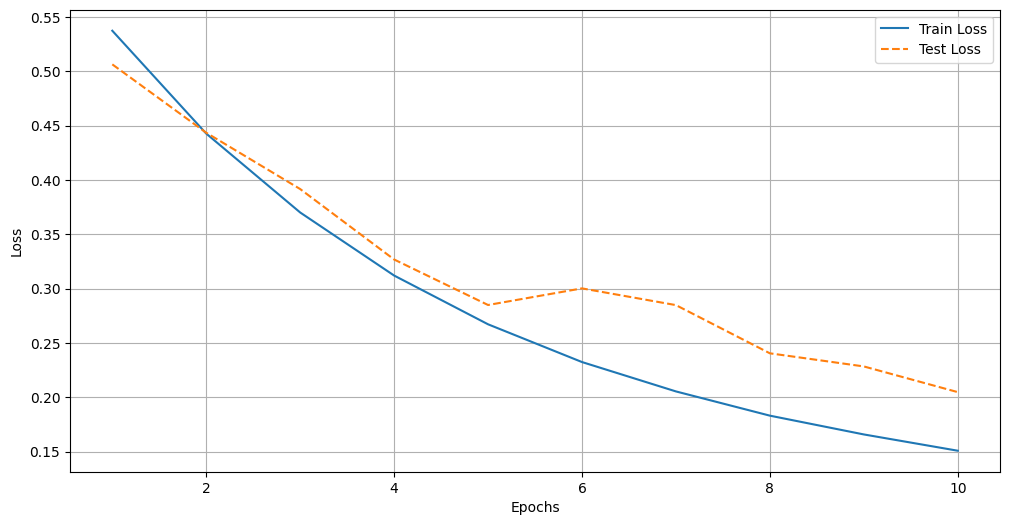

In [218]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs+1), train_losses, label = 'Train Loss')
plt.plot(range(1, epochs+1), test_losses, label = 'Test Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [219]:
new_model_2 = ClassificationNet(input_units=30, hidden_units=16, output_units=2)
optimizer = optim.Adam(new_model_2.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
  new_model_2.train()
  running_loss = 0.0
  for x, y in train_loader:
    optimizer.zero_grad()
    yaht = new_model_2(x)
    loss = criterion(yaht, y)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(train_loader)
  train_losses.append(train_loss)

  new_model_2.eval()
  test_loss = 0.0
  with torch.no_grad():
    for x, y in test_loader:
      yhat = new_model_2(x)
      loss = criterion(yhat, y)
      test_loss += loss.item()
  test_loss /= len(test_loader)
  test_losses.append(test_loss)

  print(f"Epoch: [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

Epoch: [1/10], Train Loss: 0.7351, Test Loss: 0.7084
Epoch: [2/10], Train Loss: 0.6700, Test Loss: 0.6537
Epoch: [3/10], Train Loss: 0.6089, Test Loss: 0.5859
Epoch: [4/10], Train Loss: 0.5450, Test Loss: 0.5366
Epoch: [5/10], Train Loss: 0.4781, Test Loss: 0.4567
Epoch: [6/10], Train Loss: 0.4124, Test Loss: 0.4112
Epoch: [7/10], Train Loss: 0.3495, Test Loss: 0.3639
Epoch: [8/10], Train Loss: 0.3024, Test Loss: 0.3247
Epoch: [9/10], Train Loss: 0.2630, Test Loss: 0.3198
Epoch: [10/10], Train Loss: 0.2330, Test Loss: 0.2960


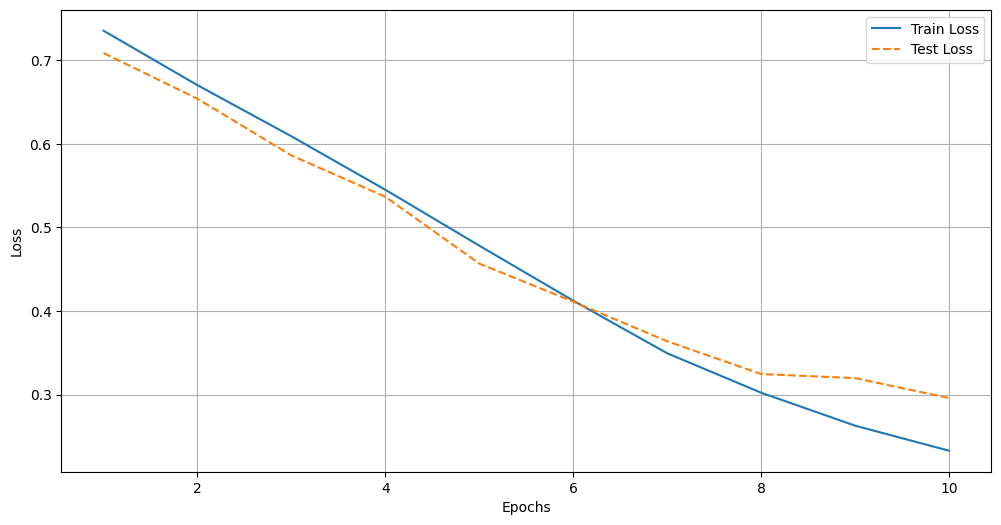

In [220]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs+1), train_losses, label = 'Train Loss')
plt.plot(range(1, epochs+1), test_losses, label = 'Test Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 3 - Try different dataset - Iris Dataset

In [221]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Extract the features and target variable
X_iris = iris.data
y_iris = iris.target

In [222]:
print(X_iris)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [223]:
print(y_iris)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [224]:
print(f"X_iris shape: ", X_iris.shape)
print(f"y_iris shape: ", y_iris.shape)

X_iris shape:  (150, 4)
y_iris shape:  (150,)


In [225]:
print(f"X_iris shape: ", X_iris.dtype)
print(f"y_iris shape: ", y_iris.dtype)

X_iris shape:  float64
y_iris shape:  int64


In [226]:
X_iris.data.shape

(150, 4)

In [227]:
!pip install scikit-learn

In [228]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

In [229]:
print(f'X_train shape', X_train.shape)
print(f'X_test shape', X_test.shape)
print(f'y_train shape', y_train.shape)
print(f'y_test shape', y_test.shape)

X_train shape (120, 4)
X_test shape (30, 4)
y_train shape (120,)
y_test shape (30,)


In [230]:
from torch.utils.data import Dataset, DataLoader

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [231]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [232]:
trainloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
testloader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

In [237]:
class lassificationNetV1(nn.Module):
  def __init__(self, input_units=4, hidden_units=8, output_units=3):
    super(lassificationNetV1, self).__init__()
    self.linear1 = nn.Linear(input_units, hidden_units)
    self.linear2 = nn.Linear(hidden_units, output_units)

  def forward(self, x):
    x = torch.relu(self.linear1(x))
    x = self.linear2(x)
    return x

Epochs: [1/10], Train Loss: 1.0753,Test Loss: 1.0445
Epochs: [2/10], Train Loss: 1.0142,Test Loss: 0.9804
Epochs: [3/10], Train Loss: 0.9417,Test Loss: 0.9030
Epochs: [4/10], Train Loss: 0.8601,Test Loss: 0.8192
Epochs: [5/10], Train Loss: 0.7602,Test Loss: 0.7277
Epochs: [6/10], Train Loss: 0.6618,Test Loss: 0.6408
Epochs: [7/10], Train Loss: 0.5693,Test Loss: 0.5619
Epochs: [8/10], Train Loss: 0.4858,Test Loss: 0.4976
Epochs: [9/10], Train Loss: 0.4229,Test Loss: 0.4454
Epochs: [10/10], Train Loss: 0.3630,Test Loss: 0.4012
10
10


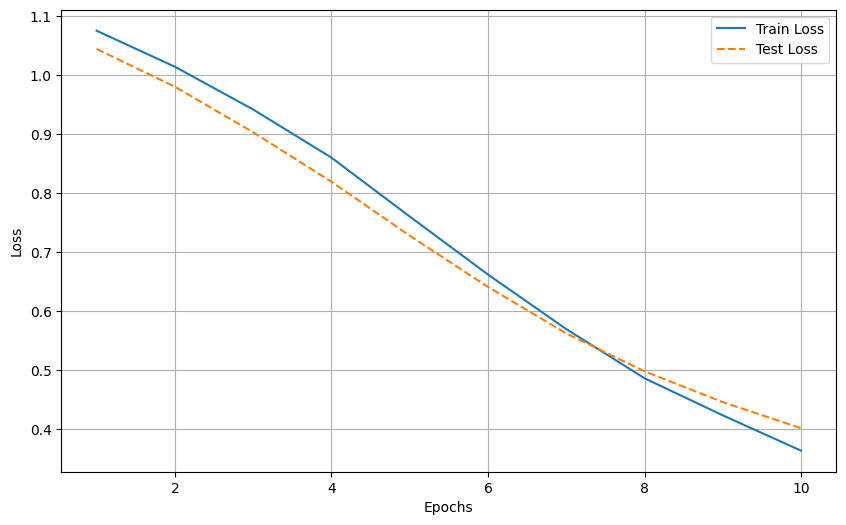

In [238]:
model = lassificationNetV1(input_units=4, hidden_units=8, output_units=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for x, y in trainloader:
    optimizer.zero_grad()
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  train_losses.append(train_loss)

  model.eval()
  test_loss = 0.0
  with torch.no_grad():
    for x, y in testloader:
      yhat = model(x)
      loss = criterion(yhat, y)
      test_loss += loss.item()
  # Calculate average test loss for the epoch
  test_loss /= len(testloader)
  test_losses.append(test_loss)

  print(f"Epochs: [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f},Test Loss: {test_loss:.4f}")

print(len(train_losses))
print(len(test_losses))
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

X_train shape (120, 4)
X_test shape (30, 4)
y_train shape (120,)
y_test shape (30,)
Epochs: [1/10], Train Loss: 1.1218,Test Loss: 1.0599
Epochs: [2/10], Train Loss: 1.0256,Test Loss: 0.9679
Epochs: [3/10], Train Loss: 0.9358,Test Loss: 0.8765
Epochs: [4/10], Train Loss: 0.8341,Test Loss: 0.7818
Epochs: [5/10], Train Loss: 0.7328,Test Loss: 0.6839
Epochs: [6/10], Train Loss: 0.6366,Test Loss: 0.5898
Epochs: [7/10], Train Loss: 0.5476,Test Loss: 0.5086
Epochs: [8/10], Train Loss: 0.4597,Test Loss: 0.4430
Epochs: [9/10], Train Loss: 0.3977,Test Loss: 0.3924
Epochs: [10/10], Train Loss: 0.3417,Test Loss: 0.3572
10
10


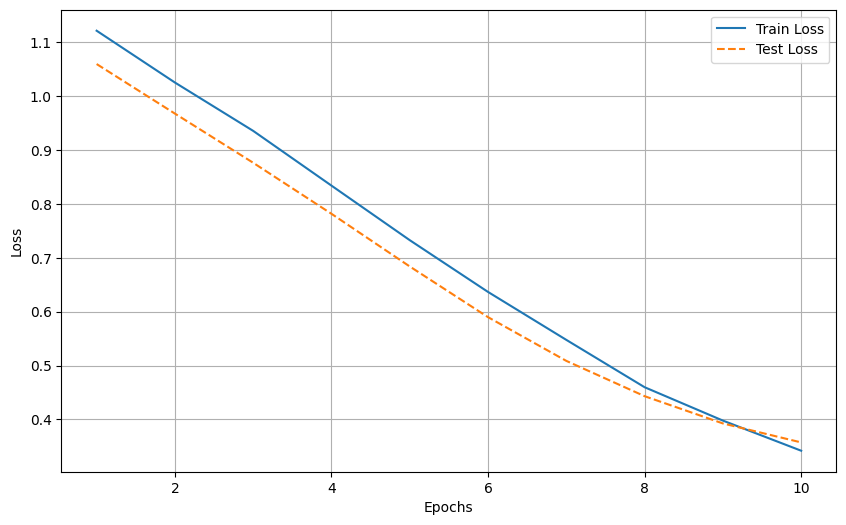

In [239]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Extract the features and target variable
X_iris = iris.data
y_iris = iris.target
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)
print(f'X_train shape', X_train.shape)
print(f'X_test shape', X_test.shape)
print(f'y_train shape', y_train.shape)
print(f'y_test shape', y_test.shape)

from torch.utils.data import Dataset, DataLoader

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

trainloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
testloader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

class lassificationNetV1(nn.Module):
  def __init__(self, input_units=4, hidden_units=8, output_units=3):
    super(lassificationNetV1, self).__init__()
    self.linear1 = nn.Linear(input_units, hidden_units)
    self.linear2 = nn.Linear(hidden_units, output_units)

  def forward(self, x):
    x = torch.relu(self.linear1(x))
    x = self.linear2(x)
    return x

model = ClassificationNet(input_units=4, hidden_units=8, output_units=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for x, y in trainloader:
    optimizer.zero_grad()
    yhat = model(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  train_losses.append(train_loss)

  model.eval()
  test_loss = 0.0
  with torch.no_grad():
    for x, y in testloader:
      yhat = model(x)
      loss = criterion(yhat, y)
      test_loss += loss.item()
  # Calculate average test loss for the epoch
  test_loss /= len(testloader)
  test_losses.append(test_loss)

  print(f"Epochs: [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f},Test Loss: {test_loss:.4f}")

print(len(train_losses))
print(len(test_losses))
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()